In [11]:
import numpy as np
import matplotlib.pyplot as plt
from neural_networks import MVENetwork

In [36]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 25
plt.rcParams['axes.linewidth'] = 0.5

## Simulating Data

In [13]:
X = np.random.uniform(0, 10, 1000)
Y = np.random.normal(loc=0.4 * np.sin(2*np.pi*X), scale=0.01)
n_hidden = np.array([40, 20, 20, 20, 10, 10, 10, 10])

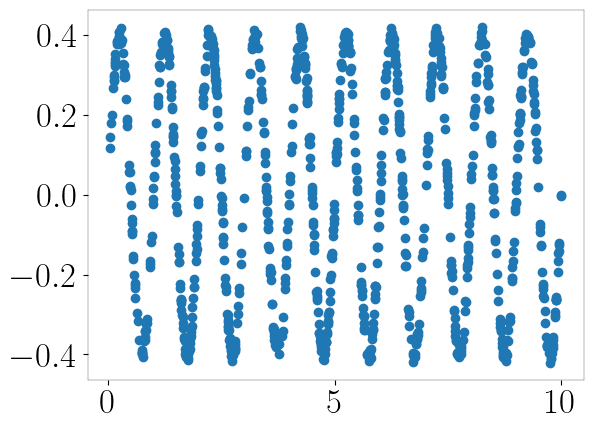

In [14]:
plt.scatter(X, Y)
plt.show()

## Simultaneously optimizing mean and variance

In [15]:
n_hidden = np.array([40, 20, 20, 20, 10, 10, 10, 10])
n_epochs = 4000

Regular loss

In [32]:
model_1 = MVENetwork(X=X, Y=Y, n_hidden_mean=n_hidden, n_hidden_var=n_hidden, n_epochs=n_epochs, verbose=1, warmup=0, fixed_mean=1, batch_size=1000, reg_mean=0, reg_var=0)

Train on 1000 samples
Epoch 1/4000
1000/1000 [==============================] - 4s 4ms/sample - loss: 1.0115
Epoch 2/4000
1000/1000 [==============================] - 0s 14us/sample - loss: 0.9981
Epoch 3/4000
1000/1000 [==============================] - 0s 11us/sample - loss: 0.9998
Epoch 4/4000
1000/1000 [==============================] - 0s 21us/sample - loss: 1.0028
Epoch 5/4000
1000/1000 [==============================] - 0s 14us/sample - loss: 1.0013
Epoch 6/4000
1000/1000 [==============================] - 0s 14us/sample - loss: 0.9984
Epoch 7/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 0.9968
Epoch 8/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.9968
Epoch 9/4000
1000/1000 [==============================] - 0s 21us/sample - loss: 0.9976
Epoch 10/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 0.9980
Epoch 11/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.9977
Epoch 12/4000

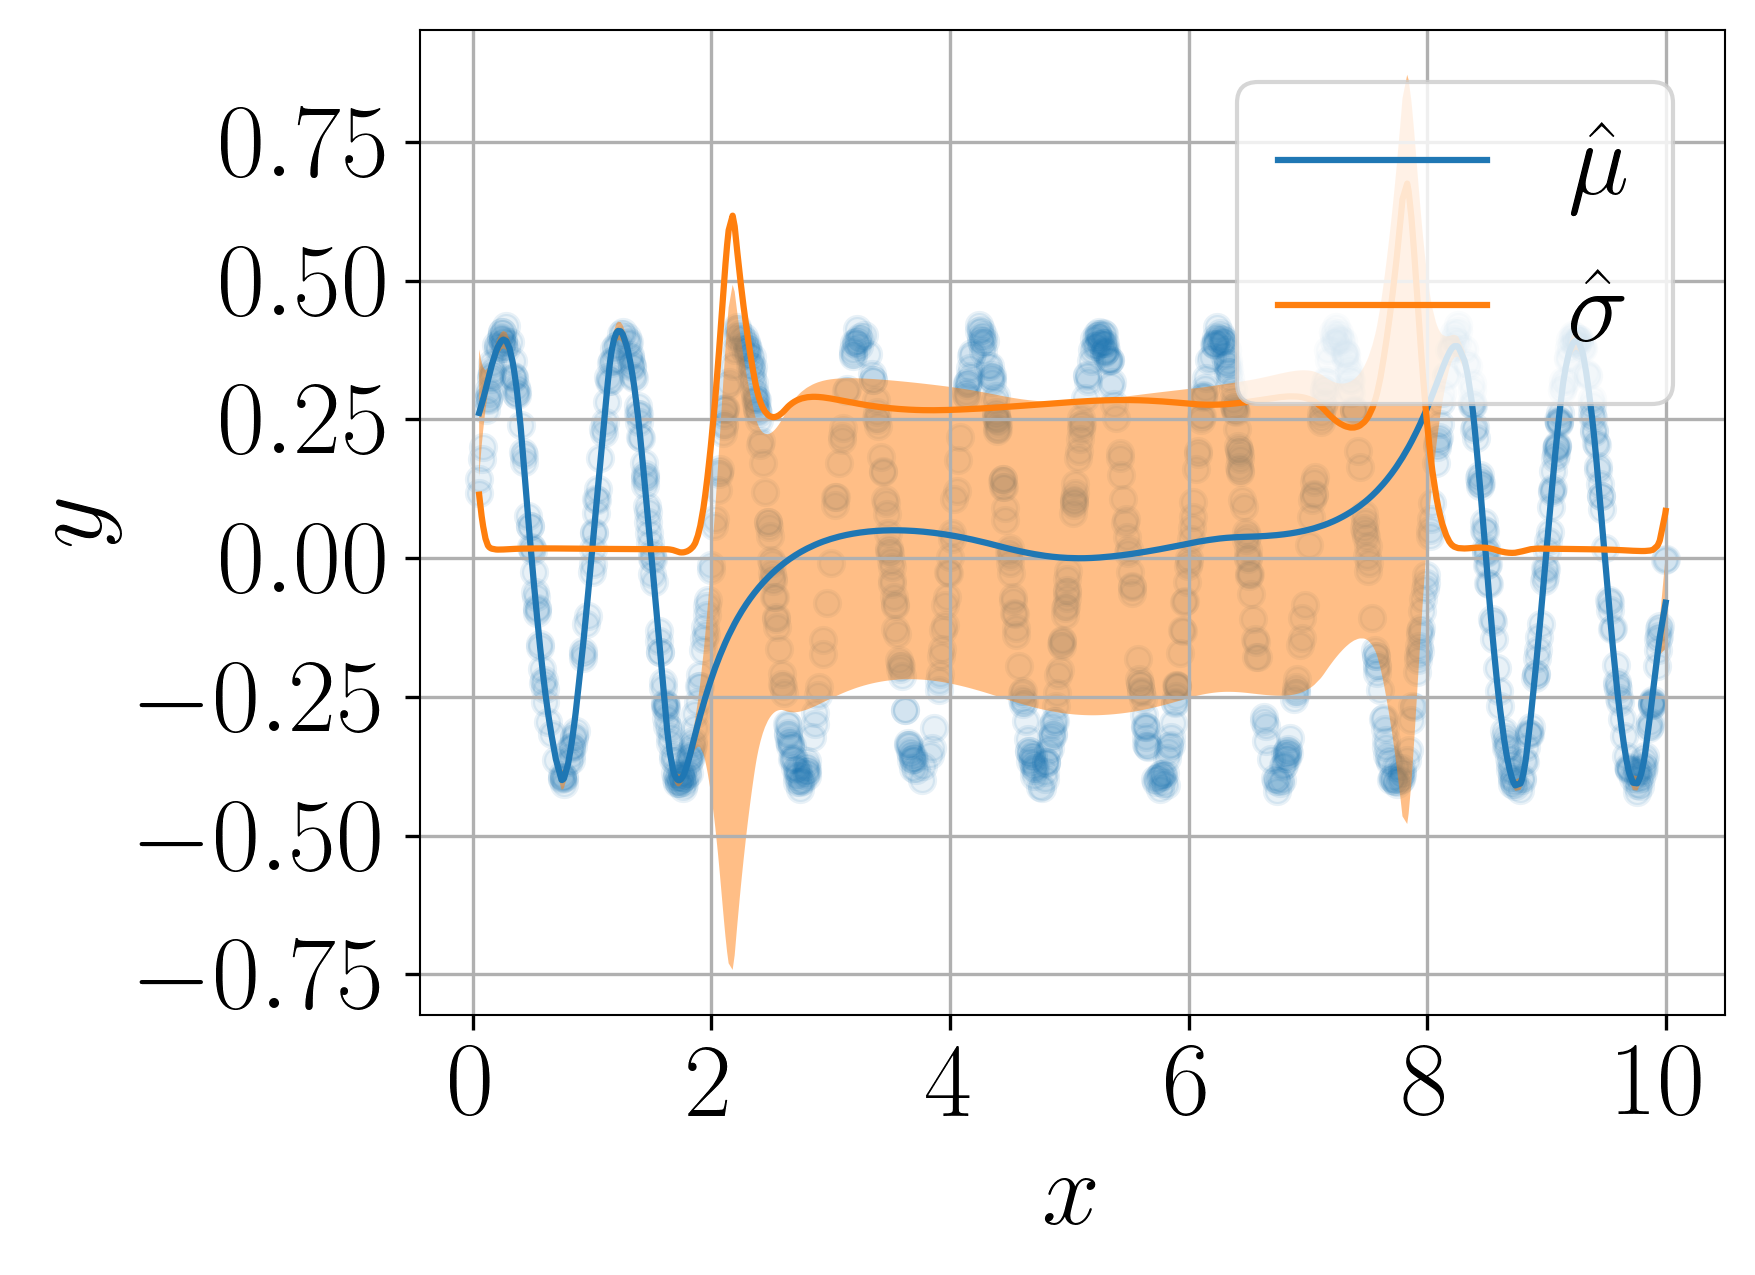

In [37]:
X_sort = np.sort(X)
plt.figure(dpi=300)
plt.scatter(X, Y, alpha=0.1)
means = model_1.f(X_sort)
sigmas = model_1.sigma(X_sort)
plt.fill_between(X_sort, means - sigmas, means + sigmas, alpha=0.5)
plt.plot(X_sort, means, label=r'$\hat{\mu}$')
plt.plot(X_sort, sigmas, label=r'$\hat{\sigma}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper right')
plt.xticks([0, 2, 4, 6, 8, 10])
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75])
plt.grid()
plt.tight_layout()
plt.show()

# $\beta$-NLL loss

In [29]:
model_2 = MVENetwork(X=X, Y=Y, n_hidden_mean=n_hidden, n_hidden_var=n_hidden, n_epochs=n_epochs, verbose=1, warmup=0, fixed_mean=1, batch_size=1000, reg_mean=0, reg_var=0, beta=0.5)

Train on 1000 samples
Epoch 1/4000
1000/1000 [==============================] - 3s 3ms/sample - loss: 1.0125
Epoch 2/4000
1000/1000 [==============================] - 0s 13us/sample - loss: 1.0013
Epoch 3/4000
1000/1000 [==============================] - 0s 11us/sample - loss: 0.9944
Epoch 4/4000
1000/1000 [==============================] - 0s 13us/sample - loss: 0.9943
Epoch 5/4000
1000/1000 [==============================] - 0s 19us/sample - loss: 0.9989
Epoch 6/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 1.0028
Epoch 7/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 1.0039
Epoch 8/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 1.0019
Epoch 9/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 0.9986
Epoch 10/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 0.9950
Epoch 11/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 0.9918
Epoch 12/4000
1

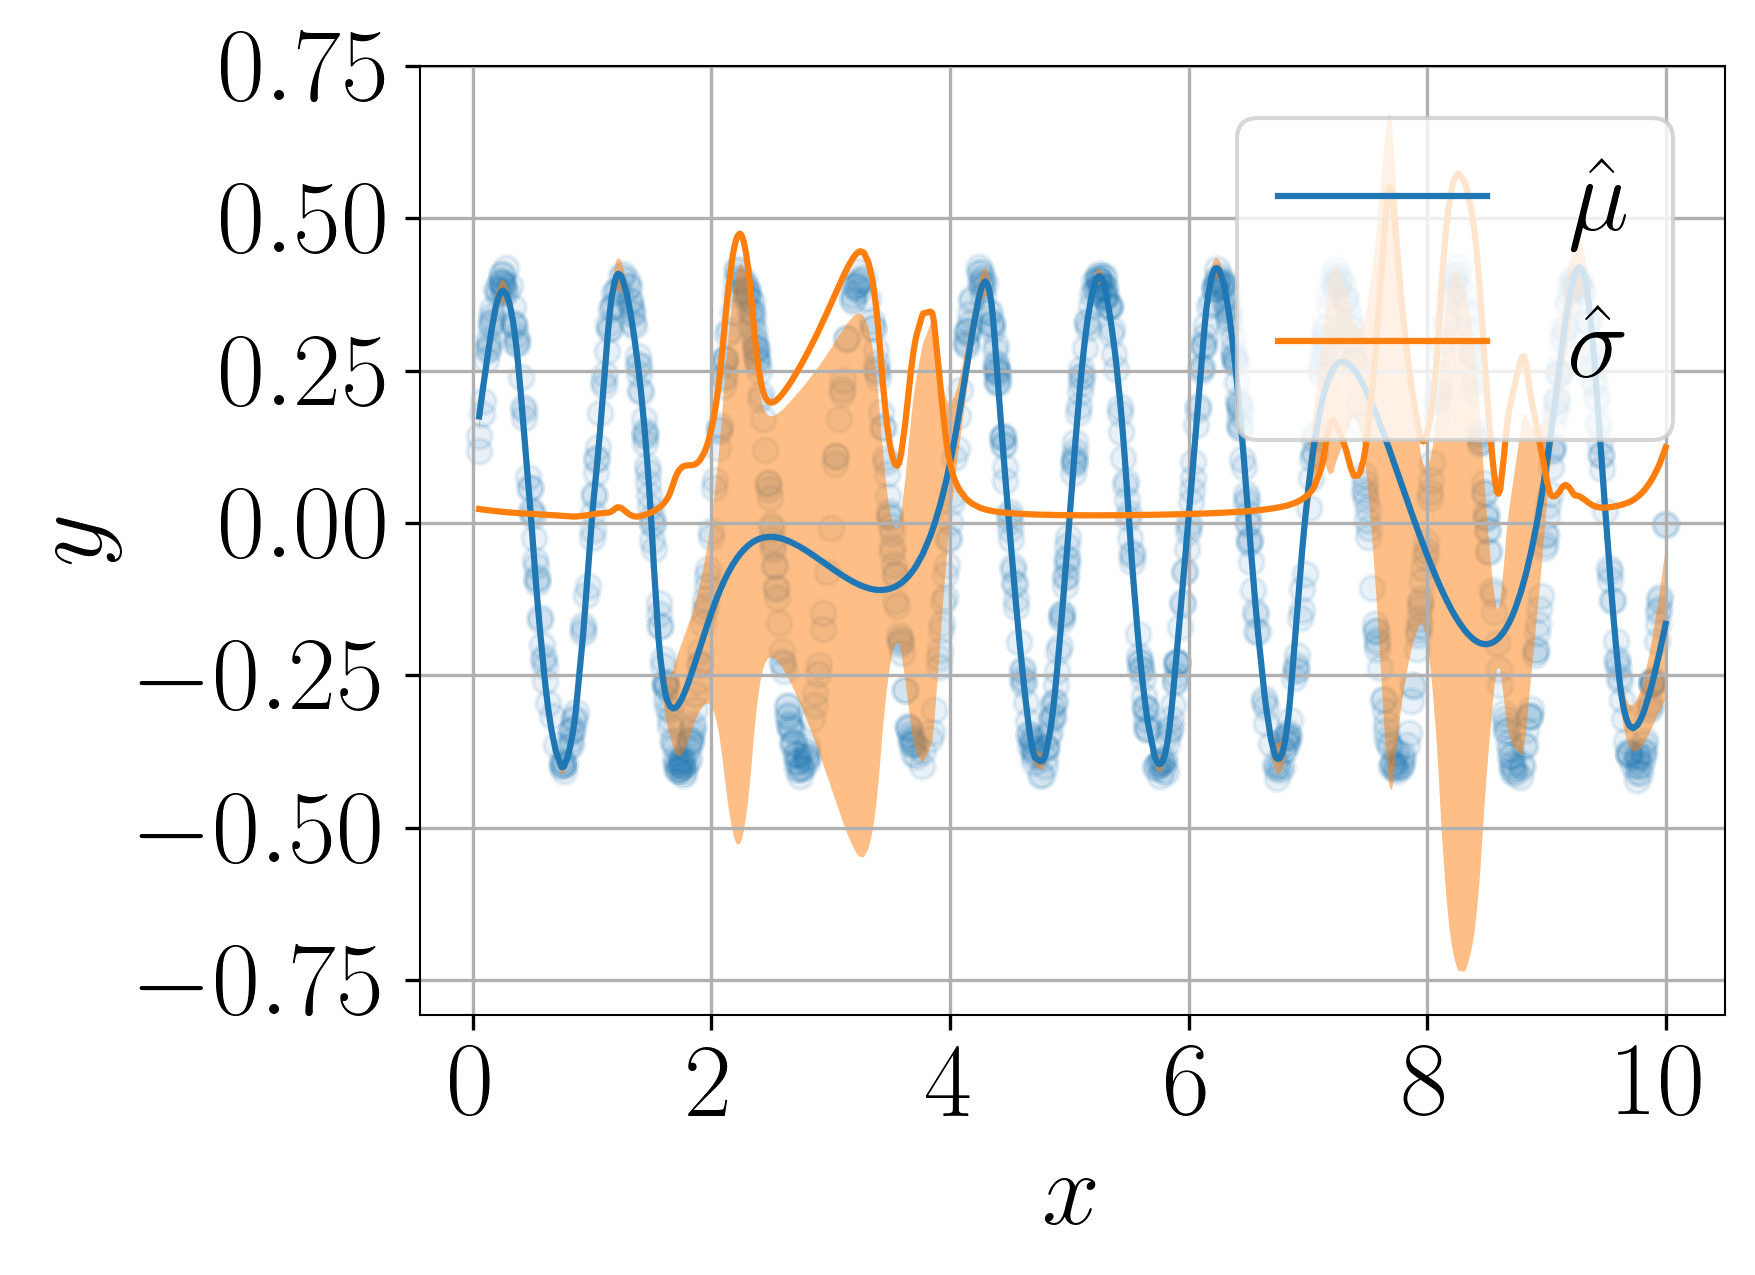

In [38]:
X_sort = np.sort(X)
plt.figure(dpi=300)
plt.scatter(X, Y, alpha=0.1)
means = model_2.f(X_sort)
sigmas = model_2.sigma(X_sort)
plt.fill_between(X_sort, means - sigmas, means + sigmas, alpha=0.5)
plt.plot(X_sort, means, label=r'$\hat{\mu}$')
plt.plot(X_sort, sigmas, label=r'$\hat{\sigma}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper right')
plt.xticks([0, 2, 4, 6, 8, 10])
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75])
plt.grid()
plt.tight_layout()
plt.show()

# Using a warm-up

In [22]:
model_3 = MVENetwork(X=X, Y=Y, n_hidden_mean=n_hidden, n_hidden_var=n_hidden, n_epochs=n_epochs, verbose=1, warmup=1, fixed_mean=1, batch_size=1000, reg_mean=0, reg_var=0)

Train on 1000 samples
Epoch 1/4000
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.2844
Epoch 2/4000
1000/1000 [==============================] - 0s 12us/sample - loss: 1.2161
Epoch 3/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 1.1558
Epoch 4/4000
1000/1000 [==============================] - 0s 11us/sample - loss: 1.1040
Epoch 5/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 1.0614
Epoch 6/4000
1000/1000 [==============================] - 0s 12us/sample - loss: 1.0293
Epoch 7/4000
1000/1000 [==============================] - 0s 14us/sample - loss: 1.0092
Epoch 8/4000
1000/1000 [==============================] - 0s 11us/sample - loss: 1.0013
Epoch 9/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 1.0031
Epoch 10/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 1.0099
Epoch 11/4000
1000/1000 [==============================] - 0s 20us/sample - loss: 1.0169
Epoch 12/4000

/Users/laurens/opt/anaconda3/envs/data_noise_variance/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 1000 samples
Epoch 1/4000
1000/1000 [==============================] - 2s 2ms/sample - loss: -4.7225
Epoch 2/4000
1000/1000 [==============================] - 0s 7us/sample - loss: -4.7356
Epoch 3/4000
1000/1000 [==============================] - 0s 19us/sample - loss: -4.7446
Epoch 4/4000
1000/1000 [==============================] - 0s 9us/sample - loss: -4.7495
Epoch 5/4000
1000/1000 [==============================] - 0s 10us/sample - loss: -4.7512
Epoch 6/4000
1000/1000 [==============================] - 0s 8us/sample - loss: -4.7513
Epoch 7/4000
1000/1000 [==============================] - 0s 10us/sample - loss: -4.7515
Epoch 8/4000
1000/1000 [==============================] - 0s 9us/sample - loss: -4.7526
Epoch 9/4000
1000/1000 [==============================] - 0s 8us/sample - loss: -4.7543
Epoch 10/4000
1000/1000 [==============================] - 0s 7us/sample - loss: -4.7561
Epoch 11/4000
1000/1000 [==============================] - 0s 8us/sample - loss: -4.7577
Epoch

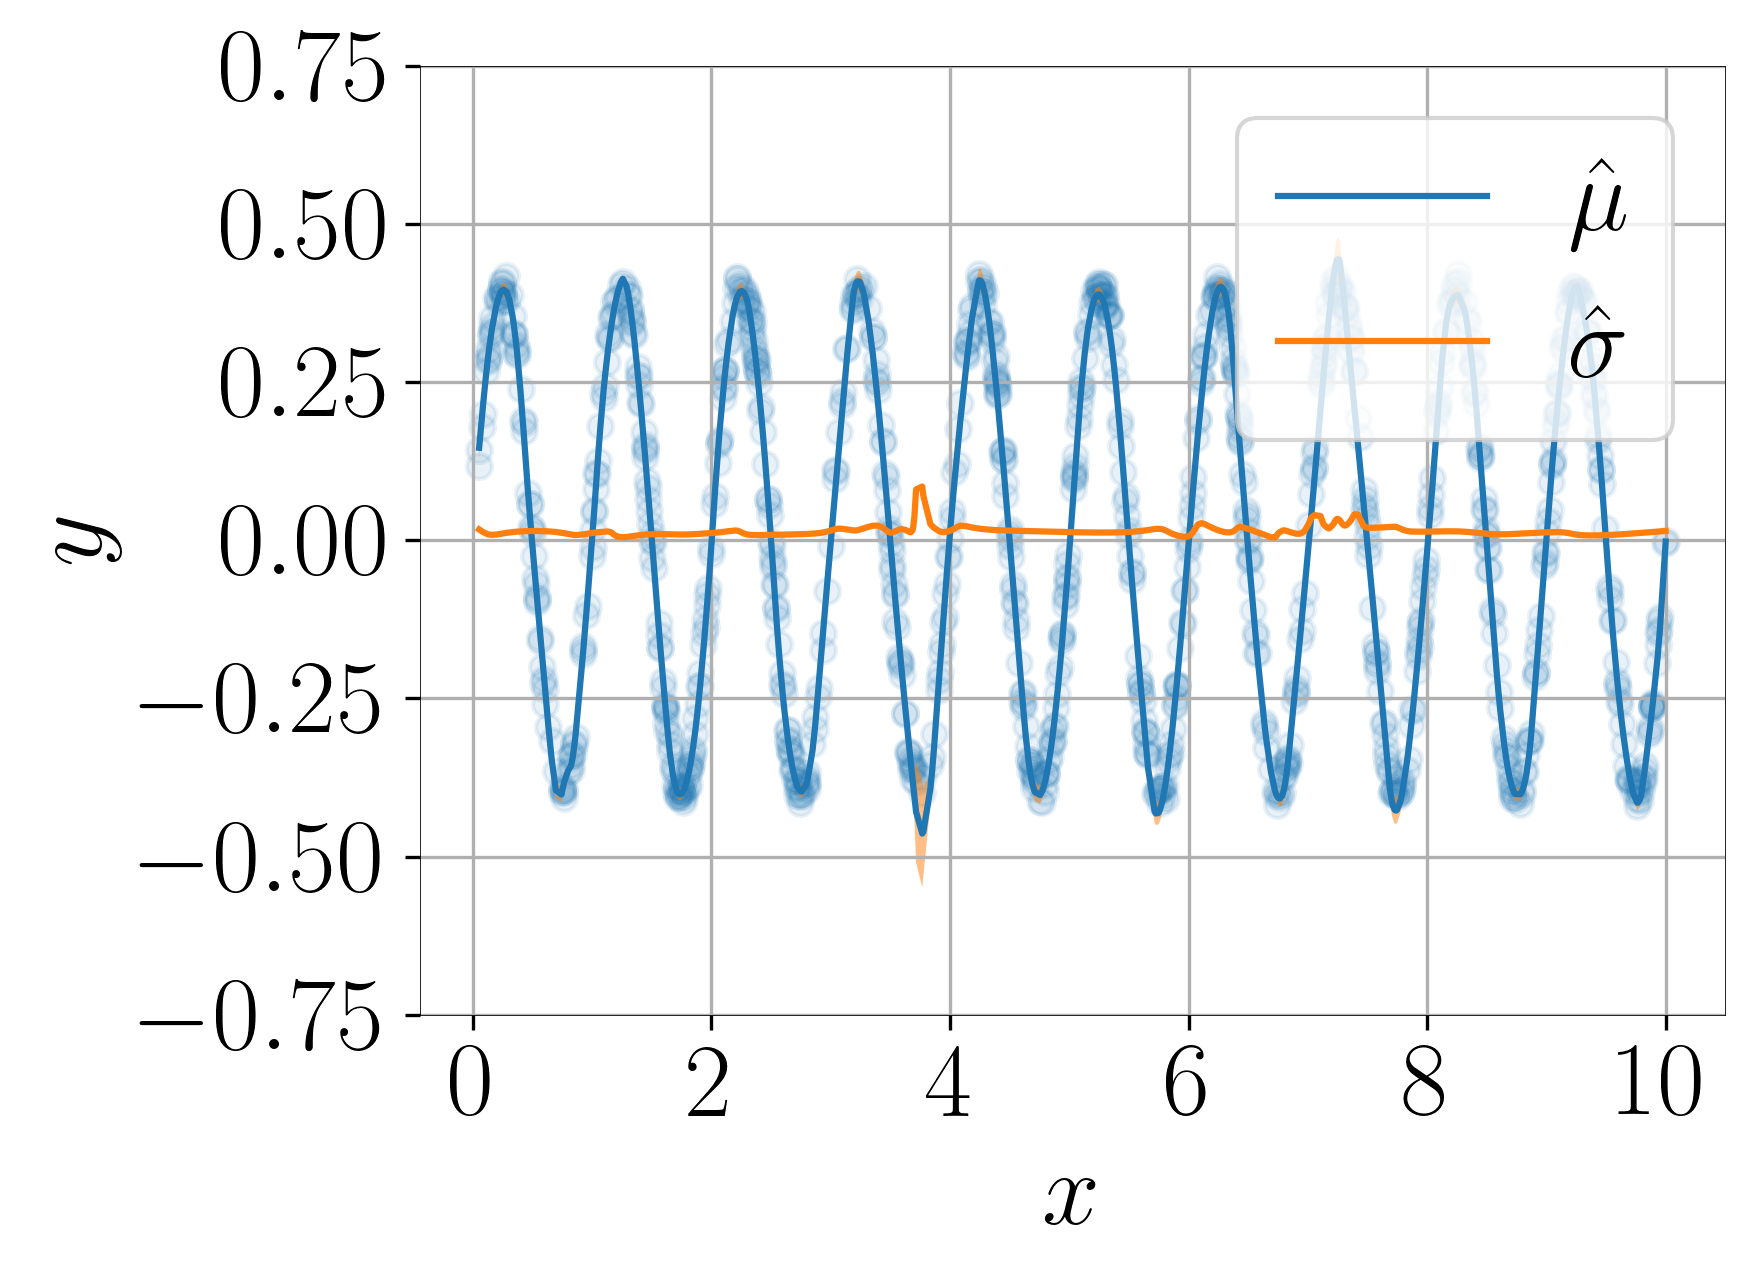

In [25]:
X_sort = np.sort(X)
plt.figure(dpi=300)
plt.scatter(X, Y, alpha=0.1)
means = model_3.f(X_sort)
sigmas = model_3.sigma(X_sort)
plt.fill_between(X_sort, means - sigmas, means + sigmas, alpha=0.5)
plt.plot(X_sort, means, label=r'$\hat{\mu}$')
plt.plot(X_sort, sigmas, label=r'$\hat{\sigma}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper right')
plt.xticks([0, 2, 4, 6, 8, 10])
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75])
plt.grid()
plt.tight_layout()
plt.show()

## No warm-up, separate regularization

In [26]:
model_4 = MVENetwork(X=X, Y=Y, n_hidden_mean=n_hidden, n_hidden_var=n_hidden, n_epochs=n_epochs, verbose=1, warmup=0, fixed_mean=1, batch_size=1000, reg_mean=0, reg_var=1)

Train on 1000 samples
Epoch 1/4000
1000/1000 [==============================] - 3s 3ms/sample - loss: 114.6437
Epoch 2/4000
1000/1000 [==============================] - 0s 29us/sample - loss: 113.7993
Epoch 3/4000
1000/1000 [==============================] - 0s 14us/sample - loss: 112.9684
Epoch 4/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 112.1347
Epoch 5/4000
1000/1000 [==============================] - 0s 8us/sample - loss: 111.3070
Epoch 6/4000
1000/1000 [==============================] - 0s 13us/sample - loss: 110.4875
Epoch 7/4000
1000/1000 [==============================] - 0s 19us/sample - loss: 109.6727
Epoch 8/4000
1000/1000 [==============================] - 0s 15us/sample - loss: 108.8603
Epoch 9/4000
1000/1000 [==============================] - 0s 16us/sample - loss: 108.0519
Epoch 10/4000
1000/1000 [==============================] - 0s 9us/sample - loss: 107.2494
Epoch 11/4000
1000/1000 [==============================] - 0s 17us/sample - loss:

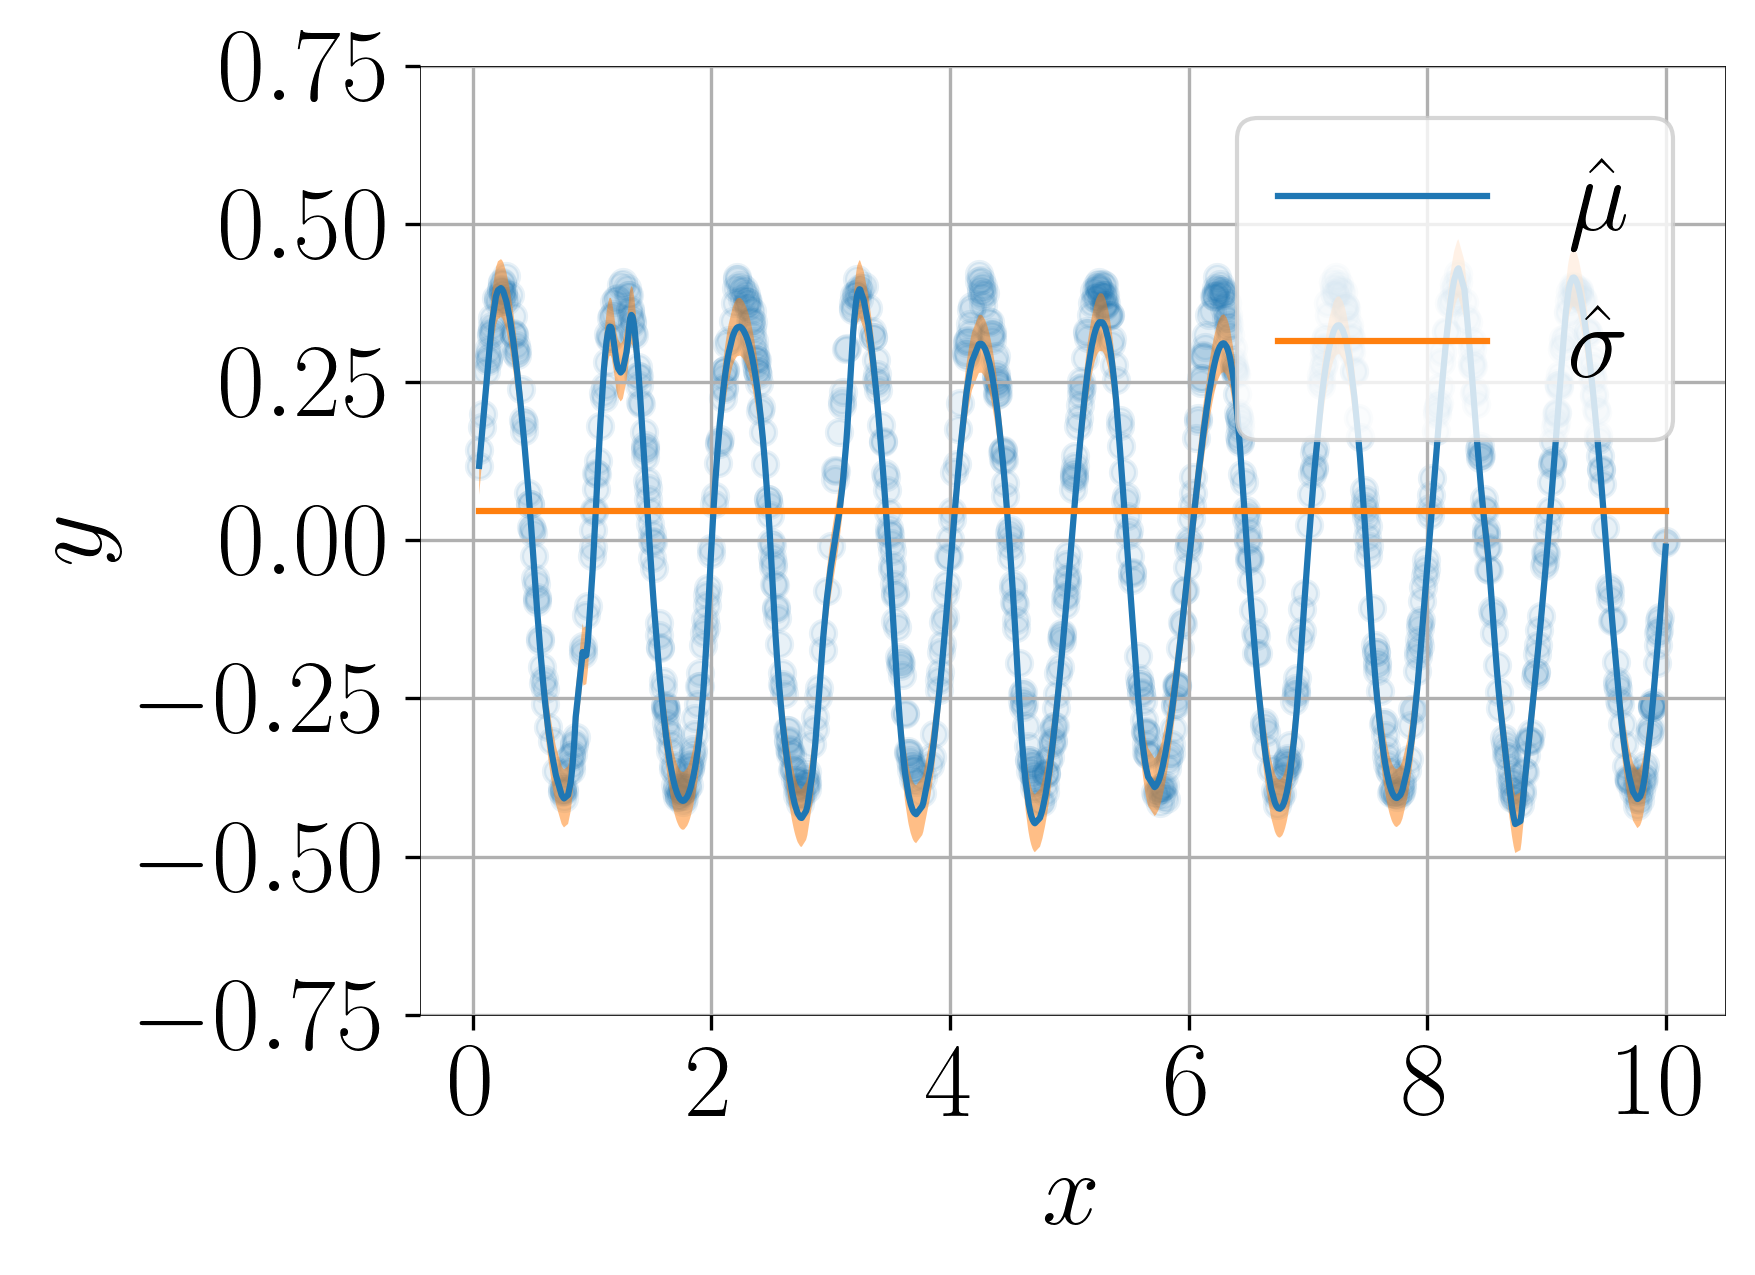

In [28]:
X_sort = np.sort(X)
plt.figure(dpi=300)
plt.scatter(X, Y, alpha=0.1)
means = model_4.f(X_sort)
sigmas = model_4.sigma(X_sort)
plt.fill_between(X_sort, means - sigmas, means + sigmas, alpha=0.5)
plt.plot(X_sort, means, label=r'$\hat{\mu}$')
plt.plot(X_sort, sigmas, label=r'$\hat{\sigma}$')
plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xticks([0, 2, 4, 6, 8, 10])
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75])
plt.grid()
plt.tight_layout()
plt.show()